In [0]:
import numpy as np

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    #import pdb;pdb.set_trace()
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

In [0]:
it = list(de(lambda x: x**2, bounds=[(-100, 100)]))

In [0]:
len(it)

1000

In [0]:
np.any(np.random.rand(8) < 0.7),np.random.rand(8) < 0.7

(True, array([ True,  True, False, False, False,  True, False, False]))

In [0]:
np.random.randint(0, 3)

1

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
%cd /content/drive/"My Drive"

/content/drive/My Drive


In [11]:
%cd ./MyIntraShare/DIP-2019/FinalProject/

/content/drive/My Drive/MyIntraShare/DIP-2019/FinalProject


In [13]:
%ls

'Priorities Project.gsheet'   Project_List.pdf  'Trial DE.ipynb'


In [61]:
from google.colab import files
files.upload()

Saving part1.png to part1.png


{'part1.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x84\x00\x00\x00\xae\x08\x06\x00\x00\x006\xfdz7\x00\x00 \x00IDATx^\xec\xbdo\x88$y\x9a\xdf\xf7\xed\xc8\x0c"#\x88\x8a\xa8 \xab\x92\x9c*\x17=;\xcc\xee2^\xe9\x90%\x0e|`\x04\xe2\xc0\x08\x810\xe8\x85\xc1\xf8\xcd\x81\x10\x07\x87@/\x0e\x0e\x810\x08c0\x06a\x04\xc6`\xecW\x07\xe2@\x08\xc1a\x10\xe2\xc0\x18\xc4\x81\x90}\x9c\xbc\x1c\'\x96\xd9\x1dz\xa7)uO\x91UIvf\x05\x91\x19Df\xb4\xf9<\xcf/\xaak\xe7vf\xe7O\xcfL\xcfn\xc5\xddluW\xe7\x9f\x88_\xfc\xe2\xf9\xf3}\xbe\xcf\xf7y\xf4w\xfe\xf1\x1f\xbd<\x9d\x9e\xe8\xadi\xa5</\x94d#%I\xa4L\x91\xa4\xbd\xd4\xef\x14E\xbdfe\xa5,\x8f\xb5\xabk\xc5\xe3\xb1\xca2\x17\xc7AR\xd7\xf1?R\x1cKIb\xbf\xd6\xbe\x97vm\xaf<\xe1s\xa4}\xc7\xdf\xf7\xf6\xe7,\x1dk6\x93\x8aD\n/\xf77\x85c+\xd9\xb7\xc7\xe1\xe7\xfd\x7f\xeb\x7f\xe6\x95\xfe:\xfb\xfc\xe1\\z\xa9m\xa5\xb6\x93\xdaFzv]+I&\x1aEcu]\xaff\xdb\xa8\xe5<\x0ecE\xc9H{u\xeaF\x9c{\xa44\xcd\xa4\x91\x7fbYIU!5\x8d\xd4\xf5\xd2r-={\xbe\xd1\xf3g\x97z\xf6\xfc\x99\x9e^^\xea\xf2\xd9F?|\xba\x

In [16]:
%ls

'Priorities Project.gsheet'   Project_List.pdf  'Trial DE.ipynb'


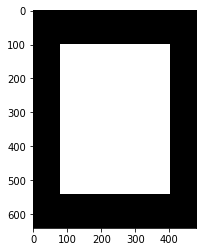

In [44]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Create a black image
img=np.zeros((640,480))
# ... and make a white rectangle in it
img[100:-100,80:-80]=1

# See how it looks
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

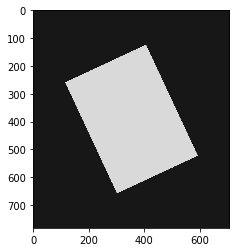

In [45]:
# Rotate it for extra fun
img=ndimage.rotate(img,25,mode='constant')
# Have another look
plt.imshow(img,cmap=plt.cm.gray)
plt.show()

In [0]:
import cv2
img = cv2.imread('./300px-Unequalized_Hawkes_Bay_NZ.jpg',0)

In [21]:
img.shape

(200, 300)

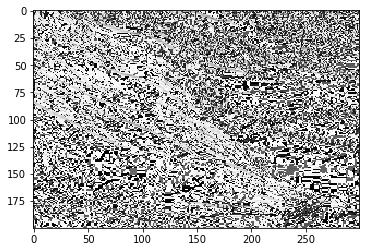

In [30]:
# Get x-gradient in "sx"
sx = ndimage.sobel(img,axis=0,mode='constant')
# Get y-gradient in "sy"
sy = ndimage.sobel(img,axis=1,mode='constant')
# Get square root of sum of squares
sobel=np.hypot(sx,sy).astype('uint8')

# Hopefully see some edges
plt.imshow(sobel,cmap=plt.cm.gray)
plt.show()

In [47]:
sobel.shape

(200, 300)

In [0]:
k = np.asarray([[1,2,3],[4,5,6]])

In [51]:
k.sum()/(k.shape[0]*k.shape[1])

3.5

In [0]:
from PIL import Image
import math
 
def image_entropy(img):
    """calculate the entropy of an image"""
    img = Image.fromarray(img)
    histogram = img.histogram()
    histogram_length = sum(histogram)
 
    samples_probability = [float(h) / histogram_length for h in histogram]
 
    return -sum([p * math.log(p, 2) for p in samples_probability if p != 0])

def average_gradient(img):
  # Get x-gradient in "sx"
  sx = ndimage.sobel(img,axis=0,mode='constant')
  # Get y-gradient in "sy"
  sy = ndimage.sobel(img,axis=1,mode='constant')
  # Get square root of sum of squares
  sobel=np.hypot(sx,sy).astype('uint8')

  # # Hopefully see some edges
  # plt.imshow(sobel,cmap=plt.cm.gray)
  # plt.show()
  return sobel.sum()/(img.shape[0]*img.shape[1])
 

def avgGradPlusEntropyForImg(img):
  totalObjective = image_entropy(img)+average_gradient(img)#BLACK AND WHITE
  return totalObjective


#img = cv2.imread('300px-Unequalized_Hawkes_Bay_NZ.jpg',0) #BLACK AND WHITE
img = cv2.imread('./part1.png') #COLOR

#print(image_entropy(img),average_gradient(img))
#totalObjective = image_entropy(img)+average_gradient(img)#BLACK AND WHITE

# print(image_entropy(img[:,:,0]),average_gradient(img[:,:,0]),image_entropy(img[:,:,1]),average_gradient(img[:,:,1]),image_entropy(img[:,:,2]),average_gradient(img[:,:,2]))
# totalObjective = image_entropy(img[:,:,0])+average_gradient(img[:,:,0])+image_entropy(img[:,:,1])+average_gradient(img[:,:,1])+image_entropy(img[:,:,2])+average_gradient(img[:,:,2])

## Take an image and contrast stretch it to test your output

In [0]:
img = cv2.imread('300px-Unequalized_Hawkes_Bay_NZ.jpg',0) #BLACK AND WHITE

(<matplotlib.image.AxesImage at 0x7f57e683f780>, 100, 223)

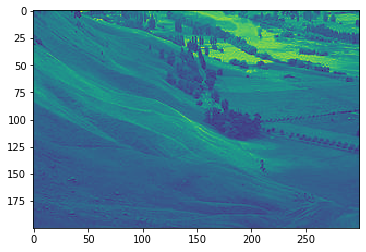

In [72]:
plt.imshow(img),img.min(),img.max()

In [0]:
w=0.3

In [0]:
#((img/255)-w)/(1-2*w)*255

In [0]:
imgContStretch = ((((img/255)-w)*(1/(1-2*w)))*255).astype('uint8')

(<matplotlib.image.AxesImage at 0x7f57e662d7f0>, 0, 253)

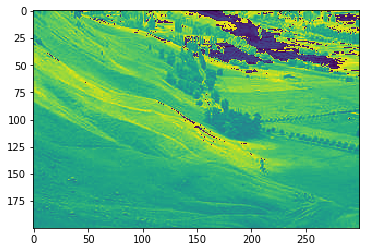

In [90]:
plt.imshow(imgContStretch),imgContStretch.min(),imgContStretch.max()

## Now use DE to get the three parameters of w, and apply one w each to R,G,B respectively and get their corresponding stretched image. Then pass that  

In [0]:
from scipy.optimize import differential_evolution
import numpy as np
def ackley(x):
  arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
  arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
  return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
bounds = [(-5, 5), (-5, 5)]
#result = differential_evolution(ackley, bounds)
result = differential_evolution(ackley, bounds, popsize = 40, mutation=0.8, recombination=0.8, maxiter = 1000  )



In [92]:
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3003
     nit: 97
 success: True
       x: array([0., 0.])

In [0]:
from scipy.optimize import differential_evolution
import numpy as np
import cv2

#Load the color image
img = cv2.imread('./part1.png') #COLOR

def stretchImageAndGetEntropyPlusGradient(w):
  #import pdb;pdb.set_trace()
  totalObjective = 0
  for i in range(3):
    #stretch image
    imgContStretch = ((((img[:,:,i]/255)-w[i])*(1/(1-2*w[i])))*255).astype('uint8')
    #Get total objective for this image
    totalObjective += avgGradPlusEntropyForImg(imgContStretch)
    # arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    # arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    # return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
  return totalObjective


In [0]:
bounds = [(0,1), (0,1),(0,1)]
result = differential_evolution(stretchImageAndGetEntropyPlusGradient, bounds, popsize = 40, mutation=0.8, recombination=0.8, maxiter = 1000  )


In [123]:
result['x']

array([0.2666072 , 0.08654636, 0.5136703 ])

In [0]:
def reconstruct(result):
  #import pdb;pdb.set_trace()

  for idx,w in enumerate(result):
    if idx == 0:
      b = ((((img[:,:,idx]/255)-w)*(1/(1-2*w)))*255).astype('uint8')
    elif idx == 1:
      g = ((((img[:,:,idx]/255)-w)*(1/(1-2*w)))*255).astype('uint8')
    else:
      r = ((((img[:,:,idx]/255)-w)*(1/(1-2*w)))*255).astype('uint8')
    
  finalImage = np.dstack((b,g,r))
    #finalImage = np.concatenate([imgContStretch,finalImage])
  return finalImage



In [0]:
#outputImg = reconstruct(result['x'])
outputImg = reconstruct(np.asarray([0.2,0.3,0.4]))

In [162]:
outputImg.shape

(174, 388, 3)

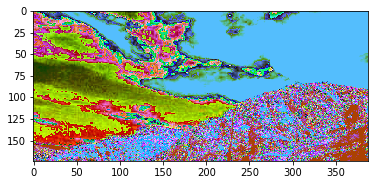

In [163]:
plt.imshow(outputImg)

255